# Text Mining Workshop Notebook
This will be the notebook that we use for the text mining lesson. The past lesson is the other Jupyter notebook in this repository, `ucsd_newspapers.ipynb`

In [42]:
import os
import re
import numpy as np
import pandas as pd
import nltk
import nltk.data

# Intro to Basic NLTK Usage: Finding Word Frequency
This intro to the [Natural Language Toolkit](http://www.nltk.org/book/ch01.html) will walk us through the basics of finding word frequency. It's a bit more advanced than earlier pre-processing, but teaches how to properly import/alias python libraries, as well as grasp what a library's methods do. And of course, it introduces you NLTK!

## First: Loading the Text Data
We have the full text corpus of text files in the root directory of this repo: `/newspaper_data/`. We should find out how many files there are.  

In Jupyter, we can use Unix/Bash code by starting the code cell with a 'bang', or exclamation point `!`. We will use a 'pipe' character `|` to chain two commands together: `ls` which would list a directory's contents, a line for each file (in this case, the total newspaper text files in `/newspaper_data/`), but instead of listing them all, we will feed this information into the second command, `wc -l`, which will count the number of lines from the first command.

In [43]:
!ls newspaper_data | wc -l

ls: cannot access 'newspaper_data': No such file or directory
0


So, there are 2,915 files. Wow! Let's look at one

In [44]:
!head -50 newspaper_data/2002-05-20.txt

head: cannot open 'newspaper_data/2002-05-20.txt' for reading: No such file or directory


Instead of using Bash/Unix to read the file, let's do it in python. For this, just like in Bash, we need to tell python where to change directories to. We do this with the `os` (short for operating system) python library we imported at the top, via the `chdir()` (short for change directory) function.  

Next, we need to open the file and have it read into memory. This is done via the `open()` function to open the file, then the `read()` file for python to read it

In [48]:
print(os.getcwd())

/home/zelgius/Github/text-mining-workshop/newspaper_data


In [49]:
# The first time we run this, we need to change directory via: os.chdir('newspaper_data')
with open('2002-05-20.txt', 'r') as fp:
    content = fp.read()
    
content[:2000]

'\nSKIMPY SPENDING \nThe new federal budget for education puts the burden of higher education on college students\' wallets. \n\nsee Opinion, page 4 \n\nCirculation \n11,000 \n\nUC SAN DIEGO \n\nUndergrad \nresearch \npresented \n90 students show \noff their findings \nBy BRIAN LAUTER \nContributing Writer \n\nMore than 90 UCSD undergrad-\nuates presented research papers \nSaturday at the 15th annual UCSD \nUndergraduate Research \nConference, held at the Faculty \nClub. \n\nStudents were organized into 17 \nroundtable discussions for the pre-\nsentations, each presided over by a \nfaculty member. The roundtables, \nwith topics ranging from chemistry \nto political science, included student \npresentations followed by group dis-\ncussions in which visitors were \nencouraged to participate. \n\nConference organizers said that \nthe UCSD Undergraduate Research \nConference as a whole was an \nopportunity to celebrate undergrad-\nuates at UCSD. \n\n"So many of the things here at \nUCSD re

## Pre-processing the Text
Although NLTK can handle some fairly messy text, it will not handle a very common occurrence in newspaper text... that is, the end of a line being hypenated, followed by a newline. We will need to filter that from our text. We can create a function to do this via regular expressions, which in python is done with the `re` library via the `re.sub()` method


In [66]:
def preprocess(text):
    return re.sub('\-\n+', '', text)

content = preprocess(content)
content[:2000]

'\nSKIMPY SPENDING \nThe new federal budget for education puts the burden of higher education on college students\' wallets. \n\nsee Opinion, page 4 \n\nCirculation \n11,000 \n\nUC SAN DIEGO \n\nUndergrad \nresearch \npresented \n90 students show \noff their findings \nBy BRIAN LAUTER \nContributing Writer \n\nMore than 90 UCSD undergraduates presented research papers \nSaturday at the 15th annual UCSD \nUndergraduate Research \nConference, held at the Faculty \nClub. \n\nStudents were organized into 17 \nroundtable discussions for the presentations, each presided over by a \nfaculty member. The roundtables, \nwith topics ranging from chemistry \nto political science, included student \npresentations followed by group discussions in which visitors were \nencouraged to participate. \n\nConference organizers said that \nthe UCSD Undergraduate Research \nConference as a whole was an \nopportunity to celebrate undergraduates at UCSD. \n\n"So many of the things here at \nUCSD regarding rese

You can see we have single digits, and it's a good guess that we'll have many more in the text. We can filter those out similar to our prepreocessing function

In [68]:
def denumber(text):
    return re.sub('[0-9]', '', text)

content = denumber(content)
content[:2000]

'\nSKIMPY SPENDING \nThe new federal budget for education puts the burden of higher education on college students\' wallets. \n\nsee Opinion, page  \n\nCirculation \n, \n\nUC SAN DIEGO \n\nUndergrad \nresearch \npresented \n students show \noff their findings \nBy BRIAN LAUTER \nContributing Writer \n\nMore than  UCSD undergraduates presented research papers \nSaturday at the th annual UCSD \nUndergraduate Research \nConference, held at the Faculty \nClub. \n\nStudents were organized into  \nroundtable discussions for the presentations, each presided over by a \nfaculty member. The roundtables, \nwith topics ranging from chemistry \nto political science, included student \npresentations followed by group discussions in which visitors were \nencouraged to participate. \n\nConference organizers said that \nthe UCSD Undergraduate Research \nConference as a whole was an \nopportunity to celebrate undergraduates at UCSD. \n\n"So many of the things here at \nUCSD regarding research are from 

## Using NLTK to Tokenize the Text
We see a whole lot of 'newline' (`\n`) characters in the text. We could manually strip those out and do other formatting of the text. Luckily, NLTK has built-in methods to do a lot of this stuff for us. We can start by "tokenizing" the text. We'll have to split it at the word boundaries, which can be passed to the tokenizer function via the regular expression `'\w+'` 

In [69]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(content)

# Printing out the first 100 words / tokens 
print(tokens[0:99])

['SKIMPY', 'SPENDING', 'The', 'new', 'federal', 'budget', 'for', 'education', 'puts', 'the', 'burden', 'of', 'higher', 'education', 'on', 'college', 'students', 'wallets', 'see', 'Opinion', 'page', 'Circulation', 'UC', 'SAN', 'DIEGO', 'Undergrad', 'research', 'presented', 'students', 'show', 'off', 'their', 'findings', 'By', 'BRIAN', 'LAUTER', 'Contributing', 'Writer', 'More', 'than', 'UCSD', 'undergraduates', 'presented', 'research', 'papers', 'Saturday', 'at', 'the', 'th', 'annual', 'UCSD', 'Undergraduate', 'Research', 'Conference', 'held', 'at', 'the', 'Faculty', 'Club', 'Students', 'were', 'organized', 'into', 'roundtable', 'discussions', 'for', 'the', 'presentations', 'each', 'presided', 'over', 'by', 'a', 'faculty', 'member', 'The', 'roundtables', 'with', 'topics', 'ranging', 'from', 'chemistry', 'to', 'political', 'science', 'included', 'student', 'presentations', 'followed', 'by', 'group', 'discussions', 'in', 'which', 'visitors', 'were', 'encouraged', 'to', 'participate']


## Making the Text Uniform (Lowercase)
We can see there are all caps words, as well as words that have initial capitlization. We'll want all the words to be uniform, which means we should lowecase them all. Python does this via the method `.lower()` 

In [70]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
    continue
    
# Printing out the first 100 words / tokens 
print(words[0:99])

['skimpy', 'spending', 'the', 'new', 'federal', 'budget', 'for', 'education', 'puts', 'the', 'burden', 'of', 'higher', 'education', 'on', 'college', 'students', 'wallets', 'see', 'opinion', 'page', 'circulation', 'uc', 'san', 'diego', 'undergrad', 'research', 'presented', 'students', 'show', 'off', 'their', 'findings', 'by', 'brian', 'lauter', 'contributing', 'writer', 'more', 'than', 'ucsd', 'undergraduates', 'presented', 'research', 'papers', 'saturday', 'at', 'the', 'th', 'annual', 'ucsd', 'undergraduate', 'research', 'conference', 'held', 'at', 'the', 'faculty', 'club', 'students', 'were', 'organized', 'into', 'roundtable', 'discussions', 'for', 'the', 'presentations', 'each', 'presided', 'over', 'by', 'a', 'faculty', 'member', 'the', 'roundtables', 'with', 'topics', 'ranging', 'from', 'chemistry', 'to', 'political', 'science', 'included', 'student', 'presentations', 'followed', 'by', 'group', 'discussions', 'in', 'which', 'visitors', 'were', 'encouraged', 'to', 'participate']


## Load in Stop Words
Stop words, in English, are words that don't convey much meaning for our analysis. Examples are articles like 'the', or prepositions like 'with'. NLTK once again has a whole built-in list of stop words so we can filter these out of our text 

In [71]:
'''Getting the English stop words from nltk
NOTE: If an error tells you to download the data, run: 
nltk.download('stopwords')'''
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[0:7])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours']


## Remove Stop Words
Now we will filter stop words from our text. If we break down our task, now that we have a large list of stop words, we will need to tell python we need all the words in our text that are _not_ in our list of stop words. You guessed it, we need another list and a `for` loop

In [72]:
# A new list that will hold our text with no Stop Words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 100 words_ns to check that stop words are gone
print(words_ns[0:99])

['skimpy', 'spending', 'new', 'federal', 'budget', 'education', 'puts', 'burden', 'higher', 'education', 'college', 'students', 'wallets', 'see', 'opinion', 'page', 'circulation', 'uc', 'san', 'diego', 'undergrad', 'research', 'presented', 'students', 'show', 'findings', 'brian', 'lauter', 'contributing', 'writer', 'ucsd', 'undergraduates', 'presented', 'research', 'papers', 'saturday', 'th', 'annual', 'ucsd', 'undergraduate', 'research', 'conference', 'held', 'faculty', 'club', 'students', 'organized', 'roundtable', 'discussions', 'presentations', 'presided', 'faculty', 'member', 'roundtables', 'topics', 'ranging', 'chemistry', 'political', 'science', 'included', 'student', 'presentations', 'followed', 'group', 'discussions', 'visitors', 'encouraged', 'participate', 'conference', 'organizers', 'said', 'ucsd', 'undergraduate', 'research', 'conference', 'whole', 'opportunity', 'celebrate', 'undergraduates', 'ucsd', 'many', 'things', 'ucsd', 'regarding', 'research', 'graduate', 'students

## Visualizing Word Frequency 
We now have a relatively clean corpus of words (`words_ns`), and can find some interesting things in the data.  

To find word frequency, we can use NLTK's [Frequency Distribution Function](http://www.nltk.org/book/ch01.html#frequency-distributions). This will automatically plot the most highly-occurring words for us, but we must pass in as an argument how many words we would like to see. Let's look at the top 25 words

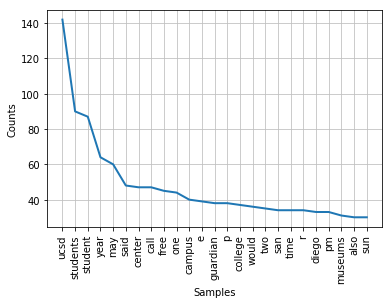

In [73]:
# This command display figures inline for jupyter
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

## Punkt Usage
Punkt from NLTK can help us do some really sophisticated pre-trained stuff in order to figure out word boundaries

In [3]:
# We need to point to nltk pre-trained data we have in this repo
sent_detector = nltk.data.load('nltk_data/english.pickle')


In [10]:
sentences = text = '''
    Punkt knows that the periods in Mr. Smith and Johann S. Bach do not mark sentence boundaries.  
    And sometimes sentences can start with non-capitalized words.  i is a good variable name. "And now for something completely different" 
    '''

In [11]:
print('\n\n'.join(sent_detector.tokenize(text.strip())))

Punkt knows that the periods in Mr. Smith and Johann S. Bach do not mark sentence boundaries.

And sometimes sentences can start with non-capitalized words.

i is a good variable name.

"And now for something completely different"
